In [2]:
import pandas as pd
import json
from analytical_solution import *
from halton_points import *
from expressions import * 

import numpy as np
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import *

from mpl_toolkits.axes_grid1 import make_axes_locatable

import plotly.graph_objects as go

In [3]:
nf = (2**2+1)**2
r = HaltonPoints(2, nf).haltonPoints()
fxl = r.copy()
fxl[:, 0] = 0
fxr = r.copy()
fxr[:, 0] = 1
fyu = r.copy()
fyu[:, 1] = 0
fyd = r.copy()
fyd[:, 1] = 1
Mb = np.vstack((fxl, fxr, fyu, fyd))

Mi = HaltonPoints(2, 81).haltonPoints()
domain = create_domain(Mi, radius=0.35, c_y=0.5, c_x=0.5)

Mi, new_boundary = domain.setup(domain='circle_centre', bound_points=40)
Mb = np.vstack((Mb, new_boundary))

X = np.vstack((Mi, Mb))

In [4]:
es = exact_solution(X, 0.001)
u = es.u(1)
#u = np.vstack((np.zeros((new_boundary.shape)), u))

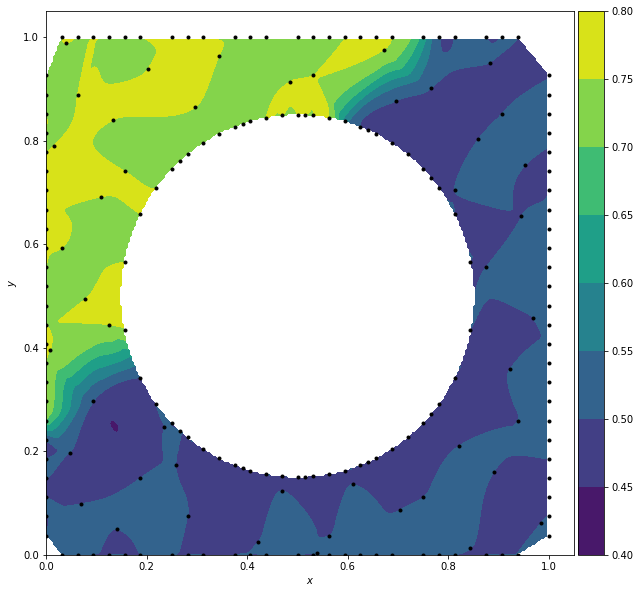

In [5]:
# data coordinates and values
x = X[:,0]#np.vstack((X, new_boundary))[:,0]
y = X[:,1]#np.vstack((X, new_boundary))[:, 1]
z = u[:, 0]

# target grid to interpolate to
xi = yi = np.arange(0,1,1/(X.shape[0] + new_boundary.shape[0]))
xi,yi = np.meshgrid(xi,yi)

# set mask
mask = np.sqrt((xi - domain.c_x)**2 + (yi - domain.c_y)**2) < domain.radius
#mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)

# interpolate
zi = griddata((x,y),z,(xi,yi), method='cubic')

# mask out the field
zi[mask] = np.nan

# plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
im = plt.contourf(xi,yi,zi)
plt.plot(x,y,'k.')
plt.xlabel('$x$')
plt.ylabel('$y$')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)
#plt.savefig('interpolated.png',dpi=100)
plt.show()

In [112]:
fig = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi)])
fig.update_layout(title='Approximate solution of Burgers equation t=0.95', autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True), colorscale="viridis")

fig.show()

In [64]:
fig = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi)])
fig.update_layout(title='Approximate solution of Burgers equation t=0.05', autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [ ]:
z.shape